In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [2]:
y, sr = librosa.load("/home/adit/Downloads/EE798P/Datasets/Melody Estimation/adc2004_full_set/daisy1.wav")

In [8]:
s_full, phase = librosa.magphase(librosa.stft(y))
freqs = librosa.fft_frequencies(sr=sr)
harms = [1, 2, 3, 4]
weights = [1.0, 0.5, 0.33, 0.25]

In [10]:
S_sal = librosa.salience(s_full, freqs=freqs, harmonics=harms, weights=weights, fill_value=0)

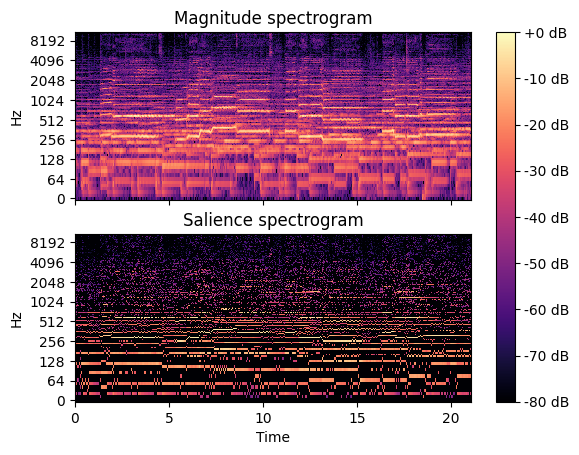

In [13]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(librosa.amplitude_to_db(s_full, ref=np.max),
                         sr=sr, y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Magnitude spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(librosa.amplitude_to_db(S_sal,
                                                       ref=np.max),
                               sr=sr, y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Salience spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")